# How to Run Notebook on Cluster

I want to run some quite heavy jobs on the cluster yet still want to see all the intermediate results and monitor the progresses.
How can I achieve this?

Let me take `evaluation/logical-error-rate/different-cluster-node-limit-/logical-error-rate-bb72.ipynb` as an example.
This is a logical error rate evaluation that involves a lot of different configurations of "cluster_node_limit" parameters.

## 1. Local Debugging

Run the notebook locally will give me a rough sense of how the data points look like. Of course, the number of samples is small so I don't actually have a good figure.
However, it doesn't really matter because we only need to make sure the script runs successfully without significant issues.
An example is shown below

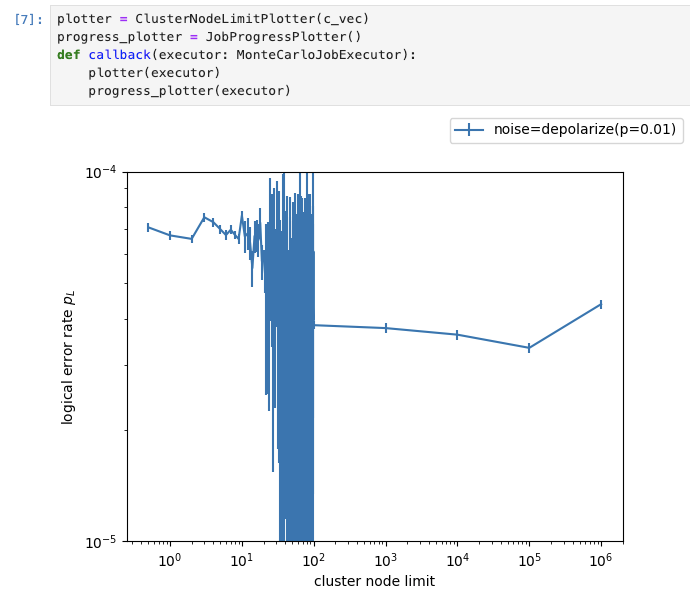

## 2. Submit Job to Slurm

We then submit the job to Slurm cluster. Note that the execution of the notebook usually takes quite a bit of memory and computation power, thus it is better to use a long-running task to execute the notebook itself.
This is not a problem if you're using some custom Slurm cluster with very powerful login node.

```sh
srun --time=1-00:00:00 --mem=10G --cpus-per-task=2 -p day \
    papermill ./logical-error-rate-bb72.ipynb logical-error-rate-bb72-2.ipynb --autosave-cell-every 10
```

We want to use another notebook to capture the output so that we can keep the original result.
Everytime we want to access the result, I can simply open `logical-error-rate-bb72-2.ipynb` and then see the result in **real time**!!
For example, connect to the SSH host in VScode and then open the notebook.

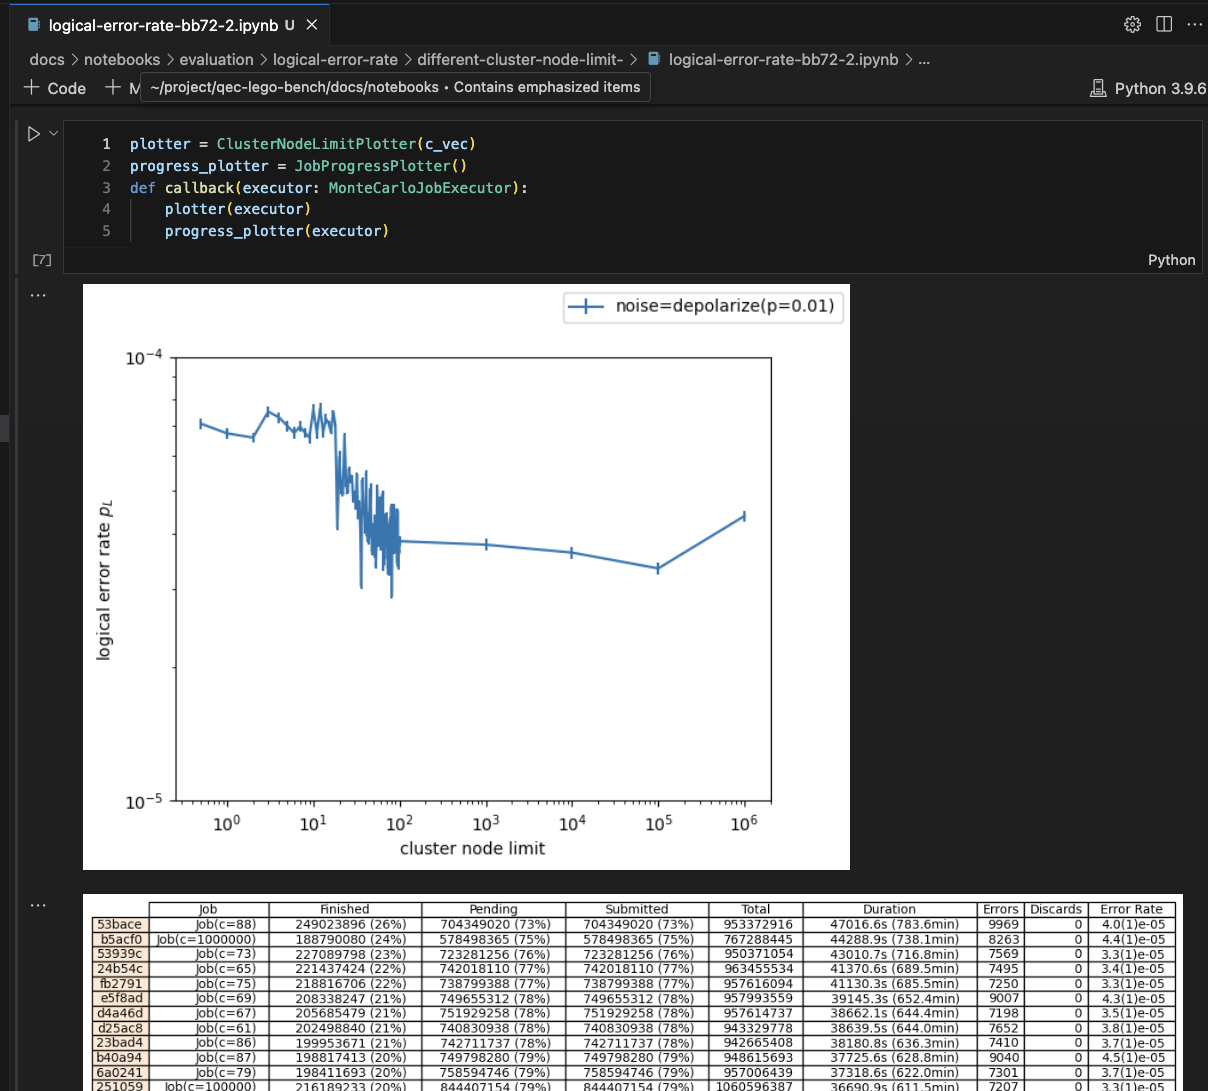

## 3. Monitor the workers

Sometimes we want to understand how the dask workers are doing, and dask provides a very nice visualization via a web page.
We can find the dashboard link here:

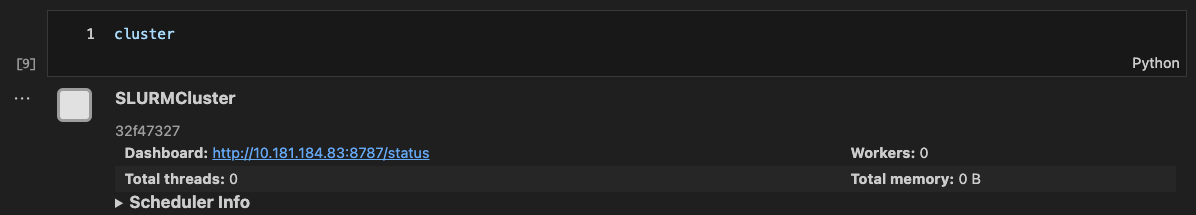

However, we usually cannot directly visit a cluster node (except for the login node).
To access the dashboard, we need to forward the port to our local machine.

```sh
ssh -L 8989:10.181.184.83:8787 grace
```

Then we can visit [http://localhost:8989](http://localhost:8989) to access the dashboard, which should look like this:

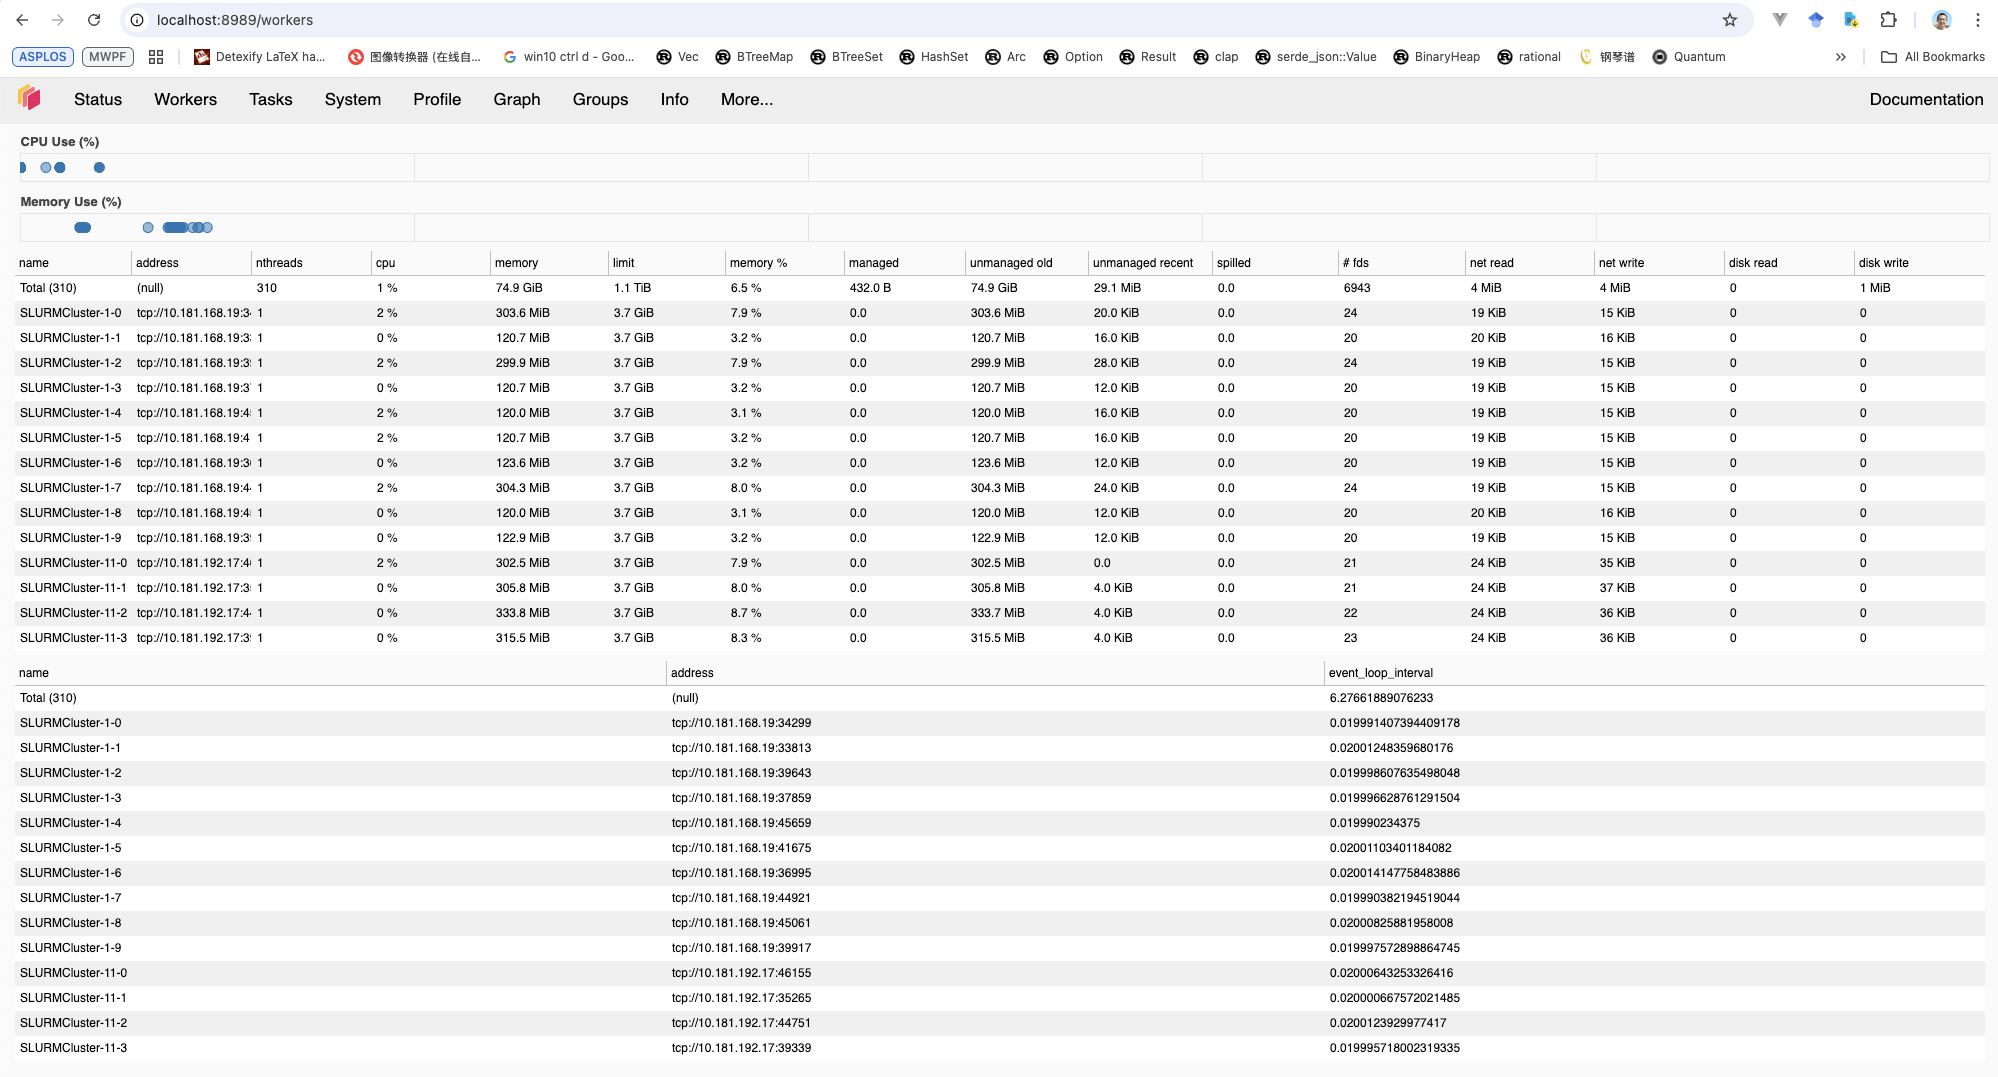

From the above result, we know that the jobs are actually not occupying all the available resources, which means we should probably decrease the value of `slurm_maximum_jobs` to avoid resource waste.

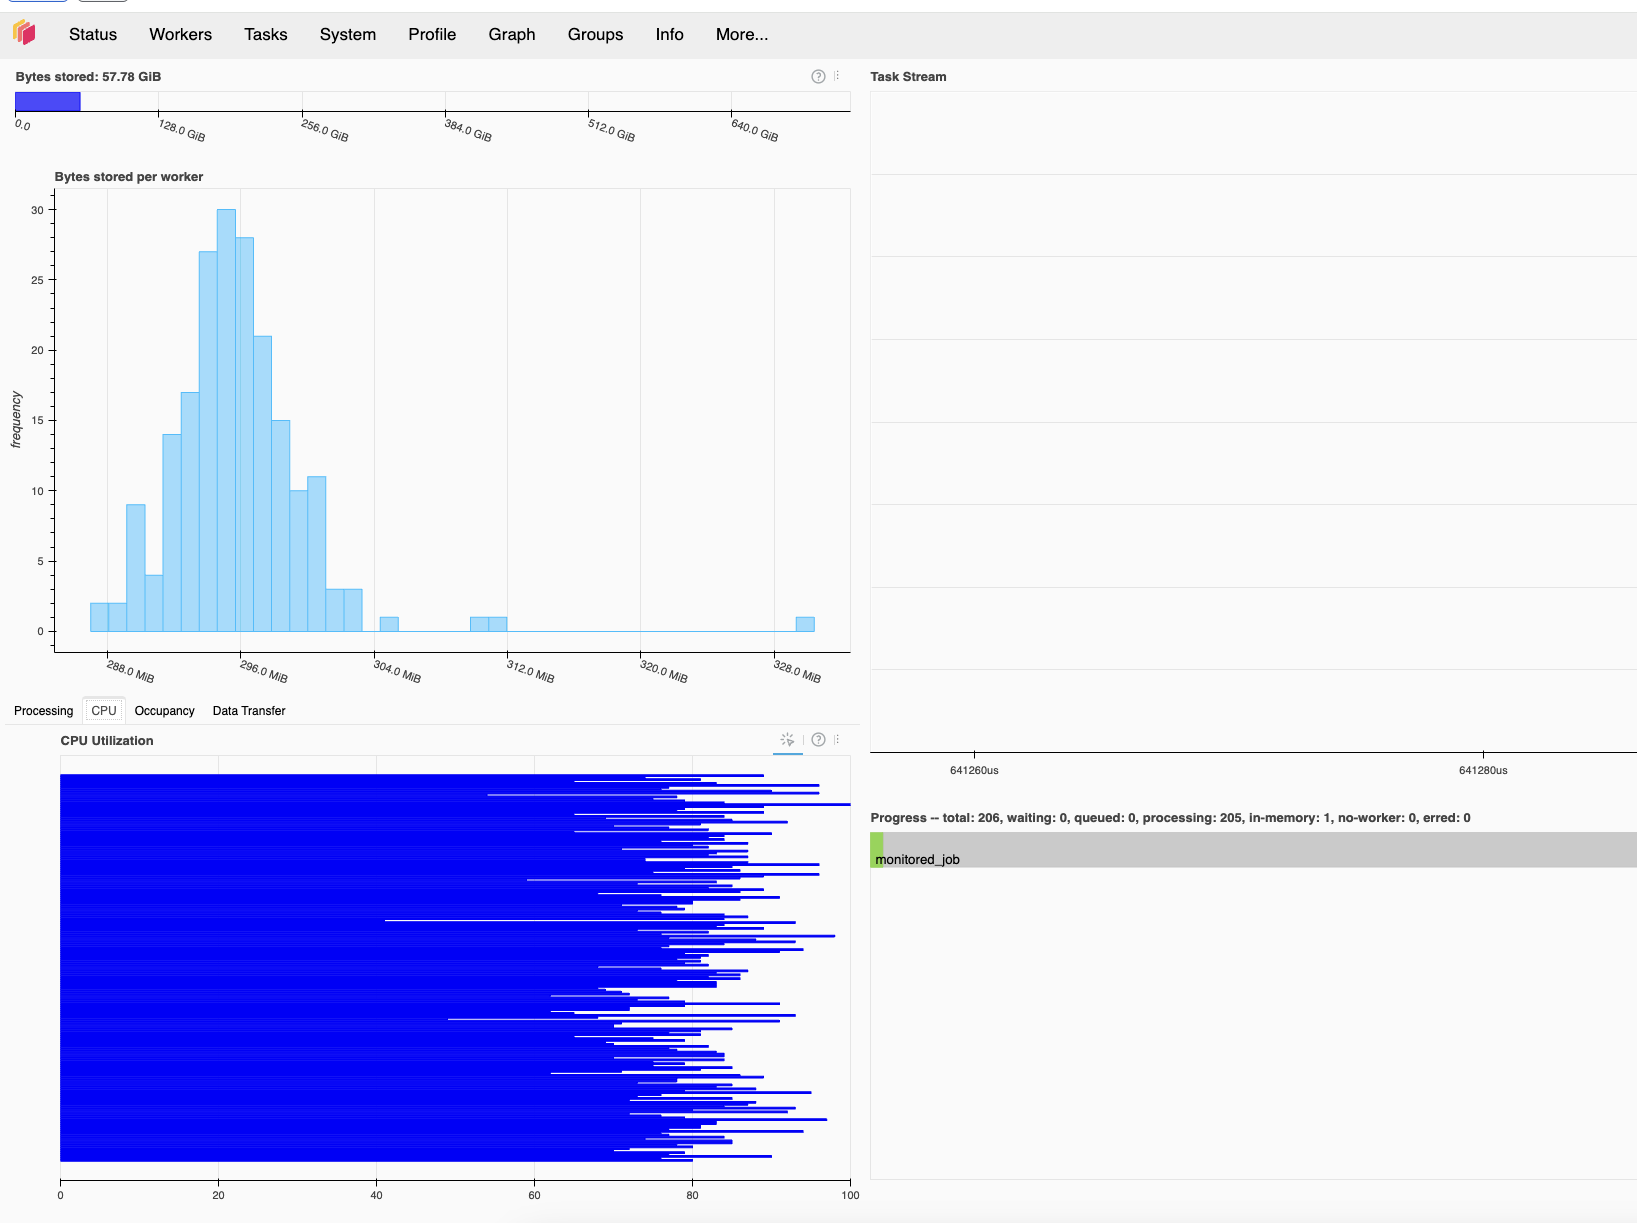

After properly setting the number of jobs, now we are efficiently using the computing resources.